# Ajuste de Curvas a Uma Lista de Pontos
## Método dos Mínimos Quadrados

---

## Função Exponencial

Dada um lista de $n$ ponto no plano $\mathbb{R}^2$: $(x_1,y_1), (x_2,y_2), \ldots, (x_n,y_n)$. Um ajuste de uma curva da forma $y(x) = \alpha + \beta e^x$ à lista de pontos pode ser obtida, pelo método dos mínimos quadrados, com:
$$
x = (A^tA)^{-1}(A^tb)
$$

Onde $A = \left[ \begin{matrix} 1 & e^{x_1} \\ 1 & e^{x_2} \\ \vdots & \vdots \\ 1 & e^{x_n} \end{matrix} \right]$, $b =  \left[ \begin{matrix} y_1 \\ y_2 \\ \vdots \\ y_n \end{matrix} \right]$.

O vetor $x$, resultado das operações $(A^tA)^{-1}(A^tb)$, tem a forma $x =  \left[ \begin{matrix} \alpha \\ \beta \end{matrix} \right]$, onde $\alpha$ e $\beta$ são os coeficientes da função exponencial ajustada:
$$
y(x) = \alpha + \beta e^x
$$

---
### Exemplo 1
Vamos ajustar uma curva exponencial da forma $y(x) = \alpha + \beta e^x$ aos pontos: $(1,1),(3,2),(5,3),(6,5),(7,7)$

No [GeoGebra](https://www.geogebra.org/m/ajynvkuz) marcamos os pontos no plano, para termos uma ideia de como será a curva ajustadas aos mesmos.

In [1]:
# Usando Python para plotar os pontos listados

# Importando o pyplot: biblioteca python para plotagem de gráficos
from matplotlib import pyplot as plt

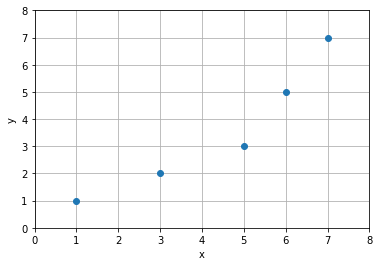

In [2]:
# Eixo x, Eixo y
plt.plot([1,3,5,6,7],[1,2,3,5,7],'o') # O argumento 'o' plota os pontos
plt.axis([0, 8, 0, 8]) # [xmin, xmax, ymin, ymax]

plt.xlabel('x'), plt.ylabel('y') # Rótulos dos eixos x e y
plt.grid() # Exibindo a grade do plano

plt.show()

In [3]:
# Resolvendo a operações x = (A^tA)^(-1)(A^tb)
# Importando a biblioteca para trabalha com matrizes e matemática
import numpy as np

In [4]:
# Criando e exibindo as matrizes necessárias para os cálculos

# Atribuindo uma aproximação de e à variável e
e = 2.71828

A = np.array([[1,e**1], [1,e**3], [1,e**5], [1,e**6], [1,e**7]])
b = np.array([[1],[2],[3],[5],[7]])

A, b

(array([[1.00000000e+00, 2.71828000e+00],
        [1.00000000e+00, 2.00854964e+01],
        [1.00000000e+00, 1.48412660e+02],
        [1.00000000e+00, 4.03427165e+02],
        [1.00000000e+00, 1.09662799e+03]]),
 array([[1],
        [2],
        [3],
        [5],
        [7]]))

In [5]:
M = A.T # a variável M recebe a tranposta da matriz A
M = M.dot(A) # a variável M recebe o protudo MA

# usamos o método inv do pacote de algebra linear de numpy para inverter M
M = np.linalg.inv(M)

M # Exibindo M

array([[ 3.34746952e-01, -4.03127033e-04],
       [-4.03127033e-04,  1.20604884e-06]])

In [6]:
N = A.T # a variável N recebe a transposta de A
N = N.dot(b) # a variável N recebe o produto Nb

N # Exibindo N

array([[   18.        ],
       [10181.65904317]])

In [7]:
# Com as operações realizadas temos
# M = (A^tA)^(-1) e N = A^tb

# A viável x recebe o produto MN
x = M.dot(N)

# Exibindo o vetor x
x

array([[1.92094314],
       [0.00502329]])

 Assim nossa função, com alguns arendodamentos, é da forma
 
 $$
 y=1.921 + 0.005 ℯ^{x}
 $$
 
 Usamos o geogebra para plotar a curva e os pontos.
 
 [GeoGebra](https://www.geogebra.org/m/thuykp7m)

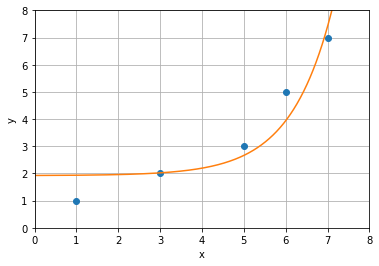

In [8]:
# Usando Python para plotar os pontos e a curva ajustada

# Plotando os pontos
plt.plot([1,3,5,6,7],[1,2,3,5,7],'o')

# Preparo para a plotagem da curva
x = np.linspace(0, 8, 1000) # 1000 pontos em [0, 8]
y = 1.921 + 0.005*e**x # Calculo dos valores y para cada x

# Plotando a curva
plt.plot(x,y)

# Configurações do Plano
plt.axis([0, 8, 0, 8])
plt.xlabel('x'), plt.ylabel('y')
plt.grid()

plt.show()

---

## Algoritmo para ajuste de uma curva exponencial a uma lista de pontos


In [9]:
'''
Método para o ajuste da curva de uma Função Exponencial a uma lista de pontos
Mínimos Quadrados

Observações:
--> Os argumentos da função são duas listas de mesmo tamanho;
--> A primeira lista com as coordenadas x dos pontos que queremos ajustar;
--> E a segunda lista com as coordenadas y dos pontos.

A função retorna um vetor x = [a,b]^T, onde y = a + b*e^x é a função exponencial.
''' 

def exponencial_minimos_quadrados(X,Y):
    import numpy as np
    from numpy.linalg import inv
    
    n = len(X)
    
    if len(X) != len(Y):
        return 'Dados de entrada incorretos.'
        
    else:
        A = np.zeros((n,2))
        v = np.zeros((n,1))
        
        for i in range(len(X)):
            v[i] = Y[i]
            A[i][0] = 1
            A[i][1] = (np.e)**(X[i])
        
        At = np.transpose(A)

        M = np.dot(At,A)
        N = np.dot(At,v)
        
        Mi = inv(M)
        x = np.dot(Mi,N)

        return x

In [10]:
# Aplicação do método para a lista de pontos
# (1,1),(3,2),(5,3),(6,5),(7,7)

X = [1,3,5,6,7]
Y = [1,2,3,5,7]

print(exponencial_minimos_quadrados(X,Y))

[[1.92094389]
 [0.00502327]]


In [11]:
# Aplicando o método para outra lista de pontos
# (1.5,1), (2.5,1.8), (3,4), (4,7)

X = [1.5,2.5,3,4]
Y = [1,1.8,4,7]

c = exponencial_minimos_quadrados(X,Y) # Vetor coeficientes
print(c)

[[0.74419094]
 [0.11848373]]


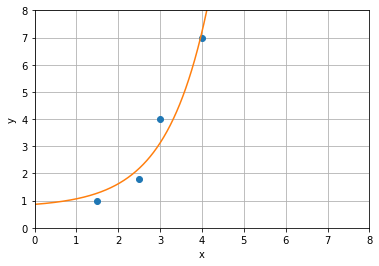

In [12]:
# Plotando os pontos e a curva ajustada
from matplotlib import pyplot as plt
import numpy as np

# Plotando os pontos
plt.plot(X,Y,'o')

x = np.linspace(0, 8, 1000) 
y = c[0] + c[1]*(np.e)**x # Calculo dos valores y para cada x

# Plotando a curva
plt.plot(x,y)

# Configurações do Plano
plt.axis([0, 8, 0, 8])
plt.xlabel('x'), plt.ylabel('y')
plt.grid()

plt.show()